## Raleigh Durham International Airport weather dataSet.


Data Source: https://catalog.data.gov/dataset/local-weather-archive <br>

This dataset contains Raleigh Durham International Airport weather data. <br>


Number of columns: 28<br>
Number of records: 4,841<br>


#### Objective:
Given a set of information, predict the average temperature?

In [1]:
# Import required libraries and packages.
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import plotly.figure_factory as ff
import plotly.offline as offline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from scipy import stats

In [2]:
# Load the dataset and convert it into a pandas dataframe object.
df = pd.read_csv('rdu-weather-history.csv', sep = ';')

# Eliminate white space in dataframe header and replace by '_'
#df.columns = df.columns.str.replace(' ','_')

# print the first 5 rows of the dataframe.
df.head()

,date,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,...,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,2012-07-02,73.9,93.9,0.00,0.0,0.0,5.14,290.0,19.91,280.0,...,No,No,No,No,No,No,No,No,No,No
1,2012-07-03,72.0,100.9,0.00,0.0,0.0,2.91,180.0,14.99,180.0,...,No,No,No,No,Yes,No,No,No,No,No
2,2012-07-10,73.0,86.0,0.01,0.0,0.0,3.58,30.0,14.99,40.0,...,No,No,No,No,Yes,No,No,No,No,No
3,2012-07-17,71.1,98.1,0.00,0.0,0.0,4.70,220.0,17.00,220.0,...,No,No,No,No,Yes,No,No,No,No,No
4,2012-07-19,75.9,99.0,0.00,0.0,0.0,9.62,230.0,17.90,140.0,...,No,No,No,No,Yes,No,No,No,No,No


In [3]:
# Print the high level info of our dataframe including null value count and Dtype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4841 entries, 0 to 4840
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  4841 non-null   object 
 1   temperaturemin        4841 non-null   float64
 2   temperaturemax        4841 non-null   float64
 3   precipitation         4841 non-null   float64
 4   snowfall              4841 non-null   float64
 5   snowdepth             4841 non-null   float64
 6   avgwindspeed          4835 non-null   float64
 7   fastest2minwinddir    4836 non-null   float64
 8   fastest2minwindspeed  4836 non-null   float64
 9   fastest5secwinddir    4819 non-null   float64
 10  fastest5secwindspeed  4819 non-null   float64
 11  fog                   4841 non-null   object 
 12  fogheavy              4841 non-null   object 
 13  mist                  4841 non-null   object 
 14  rain                  4841 non-null   object 
 15  fogground            

In [4]:
# Check number of null values in each column.
df.isna().sum()

date                     0
temperaturemin           0
temperaturemax           0
precipitation            0
snowfall                 0
snowdepth                0
avgwindspeed             6
fastest2minwinddir       5
fastest2minwindspeed     5
fastest5secwinddir      22
fastest5secwindspeed    22
fog                      0
fogheavy                 0
mist                     0
rain                     0
fogground                0
ice                      0
glaze                    0
drizzle                  0
snow                     0
freezingrain             0
smokehaze                0
thunder                  0
highwind                 0
hail                     0
blowingsnow              0
dust                     0
freezingfog              0
dtype: int64

In [5]:
# Remove rows containing nan values
df = df.dropna(subset = ['avgwindspeed',
                         'fastest2minwinddir',
                         'fastest2minwindspeed',
                         'fastest5secwinddir',
                         'fastest5secwindspeed'])  


# 2) Data Preprocessing

### 2.1) Split sparse and dense data for separate treatment.

In [6]:
# Construct two new dataframes, each for numerical and categorical columns.
df1 = df.iloc[:, 0:11]
df2 = df.iloc[:, 11:28]

In [7]:
# Check the value count of all the categorical columns
df2.apply(pd.Series.value_counts, axis = 'rows')

,fog,fogheavy,mist,rain,fogground,ice,glaze,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
No,2660,4554,4042,3950,4785,4767,4798,4607,4771,4813,4424,4243,4814,4477,4762,4750,4816
Yes,2158,264,776,868,33,51,20,211,47,5,394,575,4,341,56,68,2


In [8]:
# create an instance of LabelEncoder
le = LabelEncoder()

# apply "le.fit_transform"
df2 = df2.apply(le.fit_transform)
df2.head()

,fog,fogheavy,mist,rain,fogground,ice,glaze,drizzle,snow,freezingrain,smokehaze,thunder,highwind,hail,blowingsnow,dust,freezingfog
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [9]:
# Describe the distribution of numeric columns
df1.describe()

,temperaturemin,temperaturemax,precipitation,snowfall,snowdepth,avgwindspeed,fastest2minwinddir,fastest2minwindspeed,fastest5secwinddir,fastest5secwindspeed
count,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000
mean,50.830884,72.137484,0.129089,0.013497,0.016893,5.877721,172.903694,15.985050,176.376090,21.830886
std,16.175577,16.505006,0.368738,0.211963,0.208689,2.938715,94.102049,5.236439,96.177219,7.084742
min,4.100000,23.200000,0.000000,0.000000,0.000000,0.000000,10.000000,4.920000,10.000000,6.930000
25%,37.000000,60.100000,0.000000,0.000000,0.000000,3.800000,80.000000,12.970000,90.000000,17.000000
50%,52.000000,73.900000,0.000000,0.000000,0.000000,5.590000,210.000000,14.990000,210.000000,21.030000
75%,66.000000,86.000000,0.050000,0.000000,0.000000,7.610000,240.000000,18.120000,240.000000,25.050000
max,80.100000,105.100000,6.450000,7.010000,5.910000,20.360000,360.000000,59.950000,360.000000,86.120000


In [10]:
# Convert dtype of the date feature from Object to datetime.
df1.date = pd.to_datetime(df1.date)
print (df1.date.dtype)

# Create two new columns containing month and year out of date column.
df1['Year'] = df1.date.dt.year
df1['Month'] = df1.date.dt.month
df1['Day'] = df1.date.dt.day

# Remove original date columns.
df1 = df1.drop( ['date'], axis = 'columns')


datetime64[ns]


In [11]:
# Creating a new column with mean of minimum and maximum temperature.
col1 = df1.loc[: , "temperaturemin":"temperaturemax"]
col2 = df1.loc[: , "fastest2minwinddir":"fastest5secwinddir"]
col3 = df1.loc[: , "fastest2minwindspeed":"fastest5secwindspeed"]

df1['temperaturemean'] = col1.mean(axis = 'columns')
df1['fastestwinddir_mean'] = col2.mean(axis = 'columns')
df1['fastestwindspeed_mean'] = col3.mean(axis = 'columns')

# Remove original date columns.
# We are also removing snowdepth as 99% data points are 0 and will be removed when treating outliers.
df1 = df1.drop( ['temperaturemin',
               'temperaturemax',
               'fastest5secwinddir',
               'fastest2minwinddir',
               'fastest2minwindspeed',
               'fastest5secwindspeed',
               'snowdepth'], axis = 'columns')

### 2.2) Outlier treatment to reduce noice.

In [12]:
# Code taken from : https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame

#For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.
#Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
#all(axis=1) ensures that for each row, all column satisfy the constraint.
#Finally, result of this condition is used to index the dataframe

print('shape before removing outliers: {}'.format(df1.shape))
df1 = df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]
print('shape after removing outliers: {}'.format(df1.shape))

shape before removing outliers: (4818, 9)
shape after removing outliers: (4650, 9)


In [13]:
# Merge both dataframes.
df = df1.merge(df2, left_index=True, right_index=True, how='inner')
print(df.shape)

(4650, 26)


### 2.3) Remove multi-collinearity and check linear relationship.

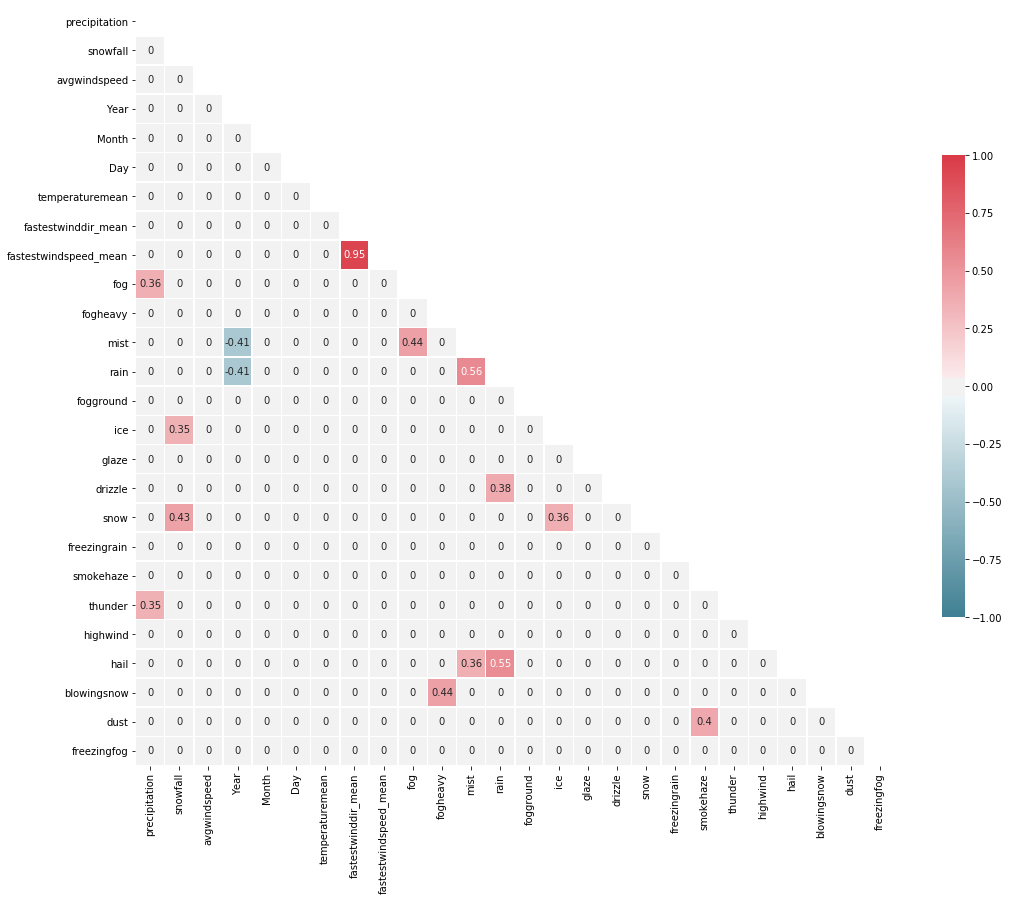

In [14]:
# Compute the correlation between all features.
corr = df.corr()

# Make all the values less than .1 (threshold) equal to 0.
corr[np.abs(corr)<.35] = 0

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(17,17))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio. We will keep annot = False as annotations makes graph look messy.
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [15]:
# check the correlation between all features and independent variable.
df[df.columns[1:]].corr()['temperaturemean'][:]

snowfall                -0.116477
avgwindspeed             0.083188
Year                    -0.016954
Month                    0.208880
Day                      0.013230
temperaturemean          1.000000
fastestwinddir_mean     -0.022341
fastestwindspeed_mean   -0.006215
fog                      0.118908
fogheavy                -0.045283
mist                     0.055117
rain                     0.043909
fogground                0.016310
ice                     -0.139744
glaze                   -0.104384
drizzle                 -0.118964
snow                    -0.137421
freezingrain            -0.058904
smokehaze                0.183907
thunder                  0.330837
highwind                 0.021381
hail                     0.041589
blowingsnow             -0.029890
dust                     0.120590
freezingfog             -0.038518
Name: temperaturemean, dtype: float64

In [16]:
# Drop the following columns based on linear relationships and multicollinearity checks.
df = df.drop(['rain',
              'mist',
              'Year',
              'snowfall',
              'hail',
              'fogheavy',
              'fastestwinddir_mean'], axis = 'columns')

### 2.4) Handling skewed data.

In [17]:
# Check the skewness of each column.
skew_data = df.skew()
print(skew_data)

precipitation             3.047149
avgwindspeed              0.640420
Month                     0.013365
Day                       0.009781
temperaturemean          -0.281140
fastestwindspeed_mean    -0.204753
fog                       0.261207
fogground                11.747564
ice                      10.929489
glaze                    17.527162
drizzle                   4.558717
snow                     11.747564
freezingrain             30.456518
smokehaze                 3.039196
thunder                   2.484945
highwind                 34.062433
blowingsnow               9.120116
dust                      8.089463
freezingfog              48.202690
dtype: float64


In [18]:
# Tried different transformations to deal skewness
# log, log+1, sqrt, boxcox ets but the final skewness comes out similar on every column
# hence removing few of the highly skewed columns

#from scipy import stats
#df["snow"].apply(np.log).hist()
#df["snow"].skew()

In [19]:
# Removing highly skewed columns
df = df.drop(['glaze',
              'freezingrain',
              'highwind',
              'freezingfog'], axis = 'columns')

## 3) Spliting and scaling data.

In [20]:
# Separate input features and target
Y = df.temperaturemean
X = df.drop('temperaturemean', axis = 'columns')

# setting up testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=36)

# Create an instance of standardscaler
sc = StandardScaler()

# Scale data to have mean 0  and std of 1
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

# Print shape of the final train and test set.
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(3720, 14) (3720,)
(930, 14) (930,)


## 4) Modelling and Evaluation.

In [21]:
warnings.filterwarnings("ignore")

# Create an instance of GradientBoostingRegressor
clf = GradientBoostingRegressor()

# Set of grid parameters
parameters = {'learning_rate': [0.01,0.02,0.03],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [100,500,1000],
              'max_depth'    : [4,6,8] }

# Use gridsearchcv to find best parameters
clf_grid = GridSearchCV(estimator=clf, param_grid = parameters, scoring = 'r2', cv = 5, n_jobs=-1)
clf_grid.fit(X_train, Y_train)    

# Results from GridSearchCV
print("\n=============================================================================")
print(" Results from Grid Search " )
print("===============================================================================")    
    
print("\n The best estimator across all params:\n", clf_grid.best_estimator_)
print("\n The best parameters across all params:\n", clf_grid.best_params_)   
print("\n The r-squared value on test data and best params:\n", clf_grid.score(X_test, Y_test))  
print("\n ============================================================================")


 Results from Grid Search 

 The best estimator across all params:
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best parameters across all params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.5}

 The r-squared value on test data and best params:
 0.846755013252765



In [22]:
# Train GradientBoostingRegressor on best parameters.
clf = GradientBoostingRegressor(learning_rate = 0.01, max_depth=  6, n_estimators = 500, subsample = 0.2)
%time clf.fit(X_train, Y_train)

# print R^2 for the training set.
print('The R-squared value for the training set is: {:0.4f}'.format(r2_score(Y_train, clf.predict(X_train))))

Wall time: 3.23 s
The R-squared value for the training set is: 0.8891


In [23]:
predicted = clf.predict(X_test)

r_squared = r2_score(Y_test, predicted)
mae = np.mean(abs(predicted - Y_test))
rmse = np.sqrt(np.mean((predicted - Y_test)**2))
rae = np.mean(abs(predicted - Y_test)) / np.mean(abs(Y_test - np.mean(Y_test)))
rse = np.mean((predicted - Y_test)**2) / np.mean((Y_test - np.mean(Y_test))**2)


results_df = pd.DataFrame(index = ['R-squared', 'Mean Absolute Error', 'Root Mean Squared Error',
                                   'Relative Absolute Error', 'Relative Squared Error'])
results_df['Gradient Boosted Machine Regression'] = [r_squared, mae, rmse, rae, rse]
results_df

,Gradient Boosted Machine Regression
R-squared,0.847933
Mean Absolute Error,4.731187
Root Mean Squared Error,6.185234
Relative Absolute Error,0.345601
Relative Squared Error,0.152067


Observation: high R-squared value on both train and test set implies that nearly 85% of the variance isexpalined by covariates in the model.

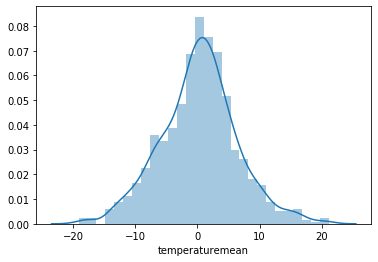

In [25]:
# to chek the distribution of the residual to verify the goodness of fit of our model.
residual = Y_test - predicted
sns.distplot(residual)

Observation: Resedual plot is perfectly normal distributed signifying ggodness of fit of our model.